<a href="https://colab.research.google.com/github/cangelogamboa/imagesOfDogs/blob/master/Softmax5Better.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Load the Libraries

In [17]:
!pip3 install tensorflow==2.0.0-beta1
!pip install --upgrade tensorflow
import tensorflow as tf

import pandas as pd
import numpy as np
import os

from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

!sudo pip install h5py
import cv2

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0b1)


###Mount the drive

In [18]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


###Use VGG16
###Change the softmax layer to 5

In [0]:
base_model=VGG16(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
#preds=Dense(120,activation='softmax')(x) #final layer with softmax activation
preds=Dense(5,activation='softmax')(x) #final layer with softmax activation

In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [22]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_1
20 dense_4
21 dense_5
22 dense_6
23 dense_7


###Set the trainable and non-trainable layers

In [0]:
for layer in model.layers:
    layer.trainable=False
# set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

###Set the classes

In [38]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('drive/My Drive/StanfordDogImages/softmax5',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1513 images belonging to 5 classes.


In [0]:
pred=model.predict_generator(train_generator,verbose=1,steps=306/20)
predicted_class_indices=np.argmax(pred,axis=1)

10/15 [==================>...........] - ETA: 2:54

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

print(labels)

In [0]:
#filepath = "drive/My Drive/StanfordDogImages/softmax5/checkpoint"
#chkPoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=15)

###Save model and recall model

In [0]:
model.save("drive/My Drive/StanfordDogImages/softmax5/model-15epochs.h5")
print("Saved model to disk")


# load model
#model = load_model('model.h5')
#summarize model
#model.summary()

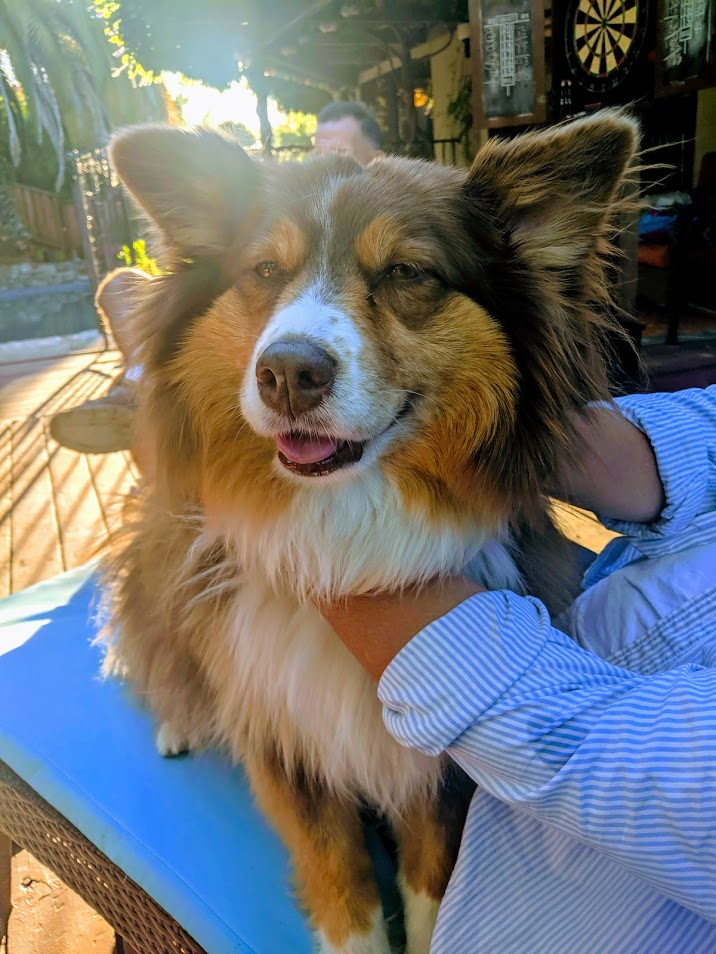

In [29]:
from IPython.display import Image
Image(filename="drive/My Drive/StanfordDogImages/kali.jpg")

In [0]:
import cv2
im4 = cv2.resize(cv2.imread('drive/My Drive/StanfordDogImages/cardigan.jpeg'), (224,224))
im4 = np.expand_dims(im4, axis=0)

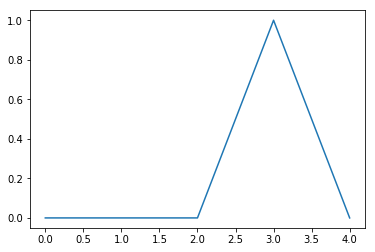

3


In [37]:
import cv2
im4 = cv2.resize(cv2.imread('drive/My Drive/StanfordDogImages/kali.jpg'), (224,224))
im4 = np.expand_dims(im4, axis=0)

out = model.predict(im4)
plt.plot(out.ravel())
plt.show()
print (np.argmax(out))

In [32]:
if np.argmax(out) == 4 :
  print("it is an aussie")

else:
  print("it is not an aussie")


it is not an aussie


#Augment the Dataset


In [0]:
#!ls drive/'My Drive'/StanfordDogImages/softmax5/n02105855-Shetland_sheepdog > drive/'My Drive'/StanfordDogImages/softmax5/Shetlands.txt
!ls drive/'My Drive'/StanfordDogImages/softmax5/n02106030-collie >            drive/'My Drive'/StanfordDogImages/softmax5/collie.txt
!ls drive/'My Drive'/StanfordDogImages/softmax5/n02106166-Border_collie >     drive/'My Drive'/StanfordDogImages/softmax5/borderCollie.txt
!ls drive/'My Drive'/StanfordDogImages/softmax5/n02113023-Pembroke >          drive/'My Drive'/StanfordDogImages/softmax5/pembroke.txt
!ls drive/'My Drive'/StanfordDogImages/softmax5/n02199999-Aussie >            drive/'My Drive'/StanfordDogImages/softmax5/aussie.txt


###shetlands

In [0]:
from PIL import Image
fileName =  "drive/My Drive/StanfordDogImages/softmax5/Shetlands.txt"
f = open(fileName, "r")
fn = f.readline()
fns = fn.strip('\n')

#Image(filename="drive/My Drive/StanfordDogImages/n02105855-Shetland_sheepdog/n02105855_10095.jpg")
filePath = "drive/My Drive/StanfordDogImages/softmax5/n02105855-Shetland_sheepdog/" 
filePath = filePath  + fns
origImage = Image.open(filePath)

In [0]:
origImage = origImage.rotate(180)  
origImage.save("drive/My Drive/StanfordDogImages/softmax5/n02105855-Shetland_sheepdog/n02105855_10093.jpg")

###Collie

In [0]:
#create a text file of each directory
#Image(filename="drive/My Drive/StanfordDogImages/n02105855-Shetland_sheepdog/n02105855_10095.jpg")

filePath = "drive/My Drive/StanfordDogImages/softmax5/n02106030-collie/" 

fileName =  "drive/My Drive/StanfordDogImages/softmax5/collie.txt"
f = open(fileName, "r")

#start loop
for x in f:
  #fn = f.readline()
  print(x)
  fns = x.strip('\n')
  filePaths = filePath  + fns
  origImage = Image.open(filePaths)
  origImage = origImage.rotate(180) 
  #calculate the new filename

  print(fns)
  fnsInt = fns.strip('.jpg')
  print(fnsInt)
  fnsInt = fnsInt.split('n02106030_')
  print(fnsInt[1])
  fnsInt[1] = int(fnsInt[1]) 
  fnsInt[1] = fnsInt[1] + 2
  print(fnsInt[1])
  fnss = 'n02106030_' + str(fnsInt[1]) + ".jpg"
  print(fnss)
  origImage.save(filePath + fnss) 
f.close()

n02106030_10021.jpg

n02106030_10021.jpg
n02106030_10021
10021
10023
n02106030_10023.jpg
n02106030_10057.jpg

n02106030_10057.jpg
n02106030_10057
10057
10059
n02106030_10059.jpg
n02106030_1005.jpg

n02106030_1005.jpg
n02106030_1005
1005
1007
n02106030_1007.jpg
n02106030_10170.jpg

n02106030_10170.jpg
n02106030_10170
10170
10172
n02106030_10172.jpg
n02106030_10246.jpg

n02106030_10246.jpg
n02106030_10246
10246
10248
n02106030_10248.jpg
n02106030_10377.jpg

n02106030_10377.jpg
n02106030_10377
10377
10379
n02106030_10379.jpg
n02106030_10459.jpg

n02106030_10459.jpg
n02106030_10459
10459
10461
n02106030_10461.jpg
n02106030_10675.jpg

n02106030_10675.jpg
n02106030_10675
10675
10677
n02106030_10677.jpg
n02106030_10883.jpg

n02106030_10883.jpg
n02106030_10883
10883
10885
n02106030_10885.jpg
n02106030_10965.jpg

n02106030_10965.jpg
n02106030_10965
10965
10967
n02106030_10967.jpg
n02106030_11024.jpg

n02106030_11024.jpg
n02106030_11024
11024
11026
n02106030_11026.jpg
n02106030_11148.jpg

n02106

###Border collie

In [0]:
#create a text file of each directory
#Image(filename="drive/My Drive/StanfordDogImages/n02105855-Shetland_sheepdog/n02105855_10095.jpg")

filePath = "drive/My Drive/StanfordDogImages/softmax5/n02106166-Border_collie/" 

fileName =  "drive/My Drive/StanfordDogImages/softmax5/borderCollie.txt"
f = open(fileName, "r")

#start loop
for x in f:
  #fn = f.readline()
  print(x)
  fns = x.strip('\n')
  filePaths = filePath  + fns
  origImage = Image.open(filePaths)
  origImage = origImage.rotate(180) 
  #calculate the new filename

  print(fns)
  fnsInt = fns.strip('.jpg')
  print(fnsInt)
  fnsInt = fnsInt.split('n02106166_')
  print(fnsInt[1])
  fnsInt[1] = int(fnsInt[1]) 
  fnsInt[1] = fnsInt[1] + 2
  print(fnsInt[1])
  fnss = 'n02106166_' + str(fnsInt[1]) + ".jpg"
  print(fnss)
  origImage.save(filePath + fnss) 
f.close()

n02106166_1031.jpg

n02106166_1031.jpg
n02106166_1031
1031
1033
n02106166_1033.jpg
n02106166_1032.jpg

n02106166_1032.jpg
n02106166_1032
1032
1034
n02106166_1034.jpg
n02106166_1055.jpg

n02106166_1055.jpg
n02106166_1055
1055
1057
n02106166_1057.jpg
n02106166_1056.jpg

n02106166_1056.jpg
n02106166_1056
1056
1058
n02106166_1058.jpg
n02106166_1059.jpg

n02106166_1059.jpg
n02106166_1059
1059
1061
n02106166_1061.jpg
n02106166_1128.jpg

n02106166_1128.jpg
n02106166_1128
1128
1130
n02106166_1130.jpg
n02106166_1133.jpg

n02106166_1133.jpg
n02106166_1133
1133
1135
n02106166_1135.jpg
n02106166_117.jpg

n02106166_117.jpg
n02106166_117
117
119
n02106166_119.jpg
n02106166_1204.jpg

n02106166_1204.jpg
n02106166_1204
1204
1206
n02106166_1206.jpg
n02106166_1205.jpg

n02106166_1205.jpg
n02106166_1205
1205
1207
n02106166_1207.jpg
n02106166_1236.jpg

n02106166_1236.jpg
n02106166_1236
1236
1238
n02106166_1238.jpg
n02106166_1244.jpg

n02106166_1244.jpg
n02106166_1244
1244
1246
n02106166_1246.jpg
n02106166_

###Pembroke

In [0]:
#create a text file of each directory
#Image(filename="drive/My Drive/StanfordDogImages/n02105855-Shetland_sheepdog/n02105855_10095.jpg")

filePath = "drive/My Drive/StanfordDogImages/softmax5/n02113023-Pembroke/" 

fileName =  "drive/My Drive/StanfordDogImages/softmax5/pembroke.txt"
f = open(fileName, "r")

#start loop
for x in f:
  #fn = f.readline()
  print(x)
  fns = x.strip('\n')
  filePaths = filePath  + fns
  origImage = Image.open(filePaths)
  origImage = origImage.rotate(180) 
  #calculate the new filename

  print(fns)
  fnsInt = fns.strip('.jpg')
  print(fnsInt)
  fnsInt = fnsInt.split('n02113023_')
  print(fnsInt[1])
  fnsInt[1] = int(fnsInt[1]) 
  fnsInt[1] = fnsInt[1] + 2
  print(fnsInt[1])
  fnss = 'n02113023_' + str(fnsInt[1]) + ".jpg"
  print(fnss)
  origImage.save(filePath + fnss) 
f.close()

n02113023_10636.jpg

n02113023_10636.jpg
n02113023_10636
10636
10638
n02113023_10638.jpg
n02113023_10829.jpg

n02113023_10829.jpg
n02113023_10829
10829
10831
n02113023_10831.jpg
n02113023_11091.jpg

n02113023_11091.jpg
n02113023_11091
11091
11093
n02113023_11093.jpg
n02113023_11103.jpg

n02113023_11103.jpg
n02113023_11103
11103
11105
n02113023_11105.jpg
n02113023_1136.jpg

n02113023_1136.jpg
n02113023_1136
1136
1138
n02113023_1138.jpg
n02113023_11397.jpg

n02113023_11397.jpg
n02113023_11397
11397
11399
n02113023_11399.jpg
n02113023_1144.jpg

n02113023_1144.jpg
n02113023_1144
1144
1146
n02113023_1146.jpg
n02113023_1151.jpg

n02113023_1151.jpg
n02113023_1151
1151
1153
n02113023_1153.jpg
n02113023_1198.jpg

n02113023_1198.jpg
n02113023_1198
1198
1200
n02113023_1200.jpg
n02113023_12192.jpg

n02113023_12192.jpg
n02113023_12192
12192
12194
n02113023_12194.jpg
n02113023_12248.jpg

n02113023_12248.jpg
n02113023_12248
12248
12250
n02113023_12250.jpg
n02113023_1257.jpg

n02113023_1257.jpg
n02113

###Aussie

In [0]:
!ls drive/'My Drive'/StanfordDogImages/softmax5/n02199999-Aussie >            drive/'My Drive'/StanfordDogImages/softmax5/aussie.txt


In [0]:
#create a text file of each directory
#Image(filename="drive/My Drive/StanfordDogImages/n02105855-Shetland_sheepdog/n02105855_10095.jpg")

filePath = "drive/My Drive/StanfordDogImages/softmax5/n02199999-Aussie/" 

fileName =  "drive/My Drive/StanfordDogImages/softmax5/aussie.txt"
f = open(fileName, "r")

#start loop
for x in f:
  #fn = f.readline()
  print(x)
  fns = x.strip('\n')
  filePaths = filePath  + fns
  origImage = Image.open(filePaths)
  origImage = origImage.rotate(180) 
  #calculate the new filename
  print(fns)
  fnsInt = fns.strip('.jpeg')
  print(fnsInt)
  fnsInt = fnsInt.split('aussie')
  print(fnsInt[1])
  fnsInt[1] = int(fnsInt[1]) 
  fnsInt[1] = fnsInt[1] + 200
  print(fnsInt[1])
  fnss = 'aussie' + str(fnsInt[1]) + ".jpeg"
  print(fnss)
  origImage.save(filePath + fnss) 
f.close()

aussie100.jpeg

aussie100.jpeg
aussie100
100
300
aussie300.jpeg
aussie101.jpeg

aussie101.jpeg
aussie101
101
301
aussie301.jpeg
aussie102.jpeg

aussie102.jpeg
aussie102
102
302
aussie302.jpeg
aussie102.jpg

aussie102.jpg
aussie102
102
302
aussie302.jpeg
aussie103.jpeg

aussie103.jpeg
aussie103
103
303
aussie303.jpeg
aussie103.jpg

aussie103.jpg
aussie103
103
303
aussie303.jpeg
aussie104.jpg

aussie104.jpg
aussie104
104
304
aussie304.jpeg
aussie105.jpg

aussie105.jpg
aussie105
105
305
aussie305.jpeg
aussie106.jpeg

aussie106.jpeg
aussie106
106
306
aussie306.jpeg
aussie107.jpeg

aussie107.jpeg
aussie107
107
307
aussie307.jpeg
aussie108.jpeg

aussie108.jpeg
aussie108
108
308
aussie308.jpeg
aussie109.jpeg

aussie109.jpeg
aussie109
109
309
aussie309.jpeg
aussie10.jpeg

aussie10.jpeg
aussie10
10
210
aussie210.jpeg
aussie110.jpeg

aussie110.jpeg
aussie110
110
310
aussie310.jpeg
aussie111.jpeg

aussie111.jpeg
aussie111
111
311
aussie311.jpeg
aussie112.jpeg

aussie112.jpeg
aussie112
112
312
aus